<a href="https://colab.research.google.com/github/sanabriadiego/s-14-24/blob/main/s_14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [33]:
df = pd.read_csv('Datos Challenge limpios.csv')

In [34]:
df

,ID_Legal,Nombre_de_Compania,Domicilio,Ciudad,Provincia,Region,Tipo_Producto,Precio,Fecha,Compania_Bandera,Latitud,Longitud
0,33-64337382-9,10 DE SETIEMBRE S.A.,Av. Mosconi 299,LOMAS DEL MIRADOR,BUENOS AIRES,PAMPEANA,Gasoil Grade 2,172.5,01/10/2022,PUMA,-34.658476,-58.529443
1,33-64337382-9,10 DE SETIEMBRE S.A.,Av. Mosconi 299,LOMAS DEL MIRADOR,BUENOS AIRES,PAMPEANA,Gasoil Grade 3,219.0,01/10/2022,PUMA,-34.658476,-58.529443
2,33-64337382-9,10 DE SETIEMBRE S.A.,Av. Mosconi 299,LOMAS DEL MIRADOR,BUENOS AIRES,PAMPEANA,Compressed Natural Gas,63.9,05/09/2022,PUMA,-34.658476,-58.529443
3,33-64337382-9,10 DE SETIEMBRE S.A.,Av. Mosconi 299,LOMAS DEL MIRADOR,BUENOS AIRES,PAMPEANA,Pretol Premium - 95 Octane,188.8,01/10/2022,PUMA,-34.658476,-58.529443
4,33-64337382-9,10 DE SETIEMBRE S.A.,Av. Mosconi 299,LOMAS DEL MIRADOR,BUENOS AIRES,PAMPEANA,Pretol Undeladed - 95/98 Octane,154.6,01/10/2022,PUMA,-34.658476,-58.529443
...,...,...,...,...,...,...,...,...,...,...,...,...
18536,33-70824089-9,ZONA CERO S.A,RIVADAVIA Nº 38,COMODORO RIVADAVIA,CHUBUT,PATAGONIA,Pretol Undeladed - 95/98 Octane,132.7,17/01/2023,AXION,-45.862240,-67.474970
18537,30-70795820-7,ZUSICO S.A.,TALCAHUANO 1198,MAR DEL PLATA,BUENOS AIRES,PAMPEANA,Gasoil Grade 2,395.7,27/10/2023,PUMA,-38.031169,-57.575518
18538,30-70795820-7,ZUSICO S.A.,TALCAHUANO 1198,MAR DEL PLATA,BUENOS AIRES,PAMPEANA,Compressed Natural Gas,199.0,26/10/2023,PUMA,-38.031169,-57.575518
18539,30-70795820-7,ZUSICO S.A.,TALCAHUANO 1198,MAR DEL PLATA,BUENOS AIRES,PAMPEANA,Pretol Premium - 95 Octane,449.2,27/10/2023,PUMA,-38.031169,-57.575518


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18541 entries, 0 to 18540
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID_Legal            18541 non-null  object 
 1   Nombre_de_Compania  18541 non-null  object 
 2   Domicilio           18541 non-null  object 
 3   Ciudad              18541 non-null  object 
 4   Provincia           18541 non-null  object 
 5   Region              18541 non-null  object 
 6   Tipo_Producto       18541 non-null  object 
 7   Precio              18541 non-null  float64
 8   Fecha               18541 non-null  object 
 9   Compania_Bandera    18541 non-null  object 
 10  Latitud             18541 non-null  float64
 11  Longitud            18541 non-null  float64
dtypes: float64(3), object(9)
memory usage: 1.7+ MB


In [36]:
df['Ciudad']

0         LOMAS DEL MIRADOR
1         LOMAS DEL MIRADOR
2         LOMAS DEL MIRADOR
3         LOMAS DEL MIRADOR
4         LOMAS DEL MIRADOR
                ...        
18536    COMODORO RIVADAVIA
18537         MAR DEL PLATA
18538         MAR DEL PLATA
18539         MAR DEL PLATA
18540         MAR DEL PLATA
Name: Ciudad, Length: 18541, dtype: object

In [37]:
columns_to_drop = ['ID_Legal', 'Nombre_de_Compania', 'Domicilio', 'Ciudad']

In [38]:
df2 = df.drop(columns_to_drop, axis=1)

In [39]:
df2

,Provincia,Region,Tipo_Producto,Precio,Fecha,Compania_Bandera,Latitud,Longitud
0,BUENOS AIRES,PAMPEANA,Gasoil Grade 2,172.5,01/10/2022,PUMA,-34.658476,-58.529443
1,BUENOS AIRES,PAMPEANA,Gasoil Grade 3,219.0,01/10/2022,PUMA,-34.658476,-58.529443
2,BUENOS AIRES,PAMPEANA,Compressed Natural Gas,63.9,05/09/2022,PUMA,-34.658476,-58.529443
3,BUENOS AIRES,PAMPEANA,Pretol Premium - 95 Octane,188.8,01/10/2022,PUMA,-34.658476,-58.529443
4,BUENOS AIRES,PAMPEANA,Pretol Undeladed - 95/98 Octane,154.6,01/10/2022,PUMA,-34.658476,-58.529443
...,...,...,...,...,...,...,...,...
18536,CHUBUT,PATAGONIA,Pretol Undeladed - 95/98 Octane,132.7,17/01/2023,AXION,-45.862240,-67.474970
18537,BUENOS AIRES,PAMPEANA,Gasoil Grade 2,395.7,27/10/2023,PUMA,-38.031169,-57.575518
18538,BUENOS AIRES,PAMPEANA,Compressed Natural Gas,199.0,26/10/2023,PUMA,-38.031169,-57.575518
18539,BUENOS AIRES,PAMPEANA,Pretol Premium - 95 Octane,449.2,27/10/2023,PUMA,-38.031169,-57.575518


In [40]:
lista_provincias = df2['Provincia'].unique()

In [41]:
print(lista_provincias)

['BUENOS AIRES' 'CHUBUT' 'SAN LUIS' 'SANTA FE' 'ENTRE RIOS' 'RIO NEGRO'
 'CHACO' 'SANTIAGO DEL ESTERO' 'MENDOZA' 'CORDOBA' 'SALTA' 'MISIONES'
 'TUCUMAN' 'CORRIENTES' 'LA PAMPA' 'CAPITAL FEDERAL' 'SANTA CRUZ'
 'CATAMARCA' 'NEUQUEN' 'JUJUY' 'FORMOSA' 'SAN JUAN' 'LA RIOJA'
 'TIERRA DEL FUEGO']


In [42]:
dict_provincias = {}
#index represents the count that enumerate does
for index, provincia in enumerate(lista_provincias):
    dict_provincias[provincia] = index

print(dict_provincias)

{'BUENOS AIRES': 0, 'CHUBUT': 1, 'SAN LUIS': 2, 'SANTA FE': 3, 'ENTRE RIOS': 4, 'RIO NEGRO': 5, 'CHACO': 6, 'SANTIAGO DEL ESTERO': 7, 'MENDOZA': 8, 'CORDOBA': 9, 'SALTA': 10, 'MISIONES': 11, 'TUCUMAN': 12, 'CORRIENTES': 13, 'LA PAMPA': 14, 'CAPITAL FEDERAL': 15, 'SANTA CRUZ': 16, 'CATAMARCA': 17, 'NEUQUEN': 18, 'JUJUY': 19, 'FORMOSA': 20, 'SAN JUAN': 21, 'LA RIOJA': 22, 'TIERRA DEL FUEGO': 23}


In [43]:
lista_regiones = df2['Region'].unique()
print(lista_regiones)

['PAMPEANA' 'PATAGONIA' 'CUYO' 'CENTRO' 'NEA' 'NOA']


In [44]:
dict_regiones = {}
#index represents the count that enumerate does
for index, region in enumerate(lista_regiones):
    dict_regiones[region] = index

print(dict_regiones)

{'PAMPEANA': 0, 'PATAGONIA': 1, 'CUYO': 2, 'CENTRO': 3, 'NEA': 4, 'NOA': 5}


In [45]:
lista_productos = df2['Tipo_Producto'].unique()
print(lista_productos)

['Gasoil Grade 2' 'Gasoil Grade 3' 'Compressed Natural Gas'
 'Pretol Premium - 95 Octane' 'Pretol Undeladed - 95/98 Octane']


In [46]:
dict_productos = {}
#index represents the count that enumerate does
for index, producto in enumerate(lista_productos):
    dict_productos[producto] = index

print(dict_productos)

{'Gasoil Grade 2': 0, 'Gasoil Grade 3': 1, 'Compressed Natural Gas': 2, 'Pretol Premium - 95 Octane': 3, 'Pretol Undeladed - 95/98 Octane': 4}


In [47]:
lista_companias = df2['Compania_Bandera'].unique()
print(lista_companias)

['PUMA' 'SHELL C.A.P.S.A.' 'YPF' 'AXION' 'BLANCA' 'GULF' 'DAPSA S.A.'
 'REFINOR' 'SIN EMPRESA BANDERA' 'VOY' 'OIL COMBUSTIBLES S.A.']


In [48]:
dict_companias = {}
#index represents the count that enumerate does
for index, compania in enumerate(lista_companias):
    dict_companias[compania] = index

print(dict_companias)

{'PUMA': 0, 'SHELL C.A.P.S.A.': 1, 'YPF': 2, 'AXION': 3, 'BLANCA': 4, 'GULF': 5, 'DAPSA S.A.': 6, 'REFINOR': 7, 'SIN EMPRESA BANDERA': 8, 'VOY': 9, 'OIL COMBUSTIBLES S.A.': 10}


In [49]:
df2['Provincia'] = df2['Provincia'].map(dict_provincias)
df2['Region'] = df2['Region'].map(dict_regiones)
df2['Tipo_Producto'] = df2['Tipo_Producto'].map(dict_productos)
df2['Compania_Bandera'] = df2['Compania_Bandera'].map(dict_companias)

In [50]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18541 entries, 0 to 18540
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Provincia         18541 non-null  int64  
 1   Region            18541 non-null  int64  
 2   Tipo_Producto     18541 non-null  int64  
 3   Precio            18541 non-null  float64
 4   Fecha             18541 non-null  object 
 5   Compania_Bandera  18541 non-null  int64  
 6   Latitud           18541 non-null  float64
 7   Longitud          18541 non-null  float64
dtypes: float64(3), int64(4), object(1)
memory usage: 1.1+ MB


In [51]:
df2['Compania_Bandera'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [52]:
df2['Fecha'] = pd.to_datetime(df2['Fecha'], format = '%d/%m/%Y', errors = 'coerce')

In [53]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18541 entries, 0 to 18540
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Provincia         18541 non-null  int64         
 1   Region            18541 non-null  int64         
 2   Tipo_Producto     18541 non-null  int64         
 3   Precio            18541 non-null  float64       
 4   Fecha             18541 non-null  datetime64[ns]
 5   Compania_Bandera  18541 non-null  int64         
 6   Latitud           18541 non-null  float64       
 7   Longitud          18541 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(4)
memory usage: 1.1 MB


In [54]:
df2['Anio'] = df2['Fecha'].dt.year

In [55]:
df2['Mes'] = df2['Fecha'].dt.month

In [56]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18541 entries, 0 to 18540
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Provincia         18541 non-null  int64         
 1   Region            18541 non-null  int64         
 2   Tipo_Producto     18541 non-null  int64         
 3   Precio            18541 non-null  float64       
 4   Fecha             18541 non-null  datetime64[ns]
 5   Compania_Bandera  18541 non-null  int64         
 6   Latitud           18541 non-null  float64       
 7   Longitud          18541 non-null  float64       
 8   Anio              18541 non-null  int32         
 9   Mes               18541 non-null  int32         
dtypes: datetime64[ns](1), float64(3), int32(2), int64(4)
memory usage: 1.3 MB


In [57]:
df2['Mes'].unique()

array([10,  9,  8,  6,  1, 12,  3,  2,  5,  4,  7, 11], dtype=int32)

In [58]:
df3 = df2.drop(['Fecha'], axis=1)

In [59]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18541 entries, 0 to 18540
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Provincia         18541 non-null  int64  
 1   Region            18541 non-null  int64  
 2   Tipo_Producto     18541 non-null  int64  
 3   Precio            18541 non-null  float64
 4   Compania_Bandera  18541 non-null  int64  
 5   Latitud           18541 non-null  float64
 6   Longitud          18541 non-null  float64
 7   Anio              18541 non-null  int32  
 8   Mes               18541 non-null  int32  
dtypes: float64(3), int32(2), int64(4)
memory usage: 1.1 MB


In [60]:
df3.describe()

,Provincia,Region,Tipo_Producto,Precio,Compania_Bandera,Latitud,Longitud,Anio,Mes
count,18541.000000,18541.000000,18541.000000,18541.000000,18541.000000,18541.000000,18541.000000,18541.000000,18541.000000
mean,5.694569,1.761987,1.996494,321.748134,2.299013,-33.401262,-61.590828,2022.744404,9.352948
std,6.096090,1.749968,1.507385,109.960590,1.586592,4.095790,3.612381,1.034875,1.715220
min,0.000000,0.000000,0.000000,7.000000,0.000000,-54.829501,-72.338930,2016.000000,1.000000
25%,0.000000,0.000000,1.000000,291.000000,1.000000,-34.791930,-64.264660,2023.000000,10.000000
50%,3.000000,1.000000,2.000000,339.000000,2.000000,-33.906430,-60.675087,2023.000000,10.000000
75%,9.000000,3.000000,3.000000,397.000000,3.000000,-31.442723,-58.552110,2023.000000,10.000000
max,23.000000,5.000000,4.000000,750.000000,10.000000,-22.055820,-53.648260,2023.000000,12.000000


<Axes: >

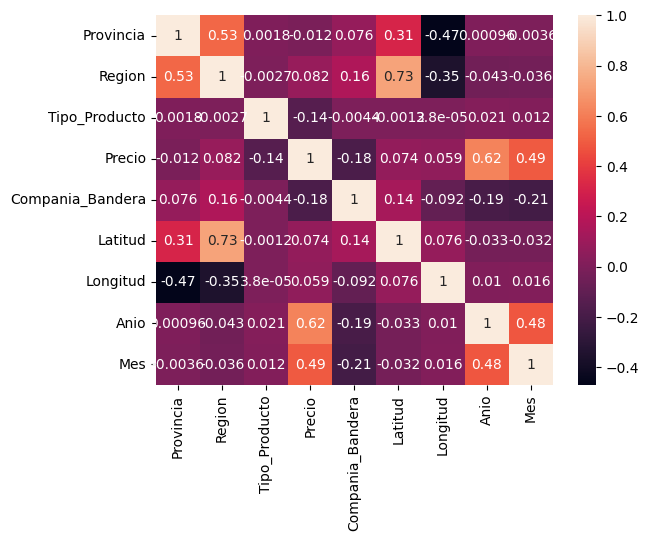

In [61]:
sns.heatmap(df3.corr(), annot=True)

ANÁLISIS DE ALGORITMOS

In [62]:
# X = df3[['Provincia', 'Region', 'Tipo_Producto', 'Compania_Bandera', 'Latitud', 'Longitud', 'Anio', 'Mes']]
X = df3[['Provincia', 'Region', 'Tipo_Producto', 'Compania_Bandera', 'Anio', 'Mes']]
# X = df3[['Region', 'Tipo_Producto', 'Compania_Bandera', 'Anio', 'Mes']]

y = df3['Precio'].astype(int)

In [63]:
X

,Provincia,Region,Tipo_Producto,Compania_Bandera,Anio,Mes
0,0,0,0,0,2022,10
1,0,0,1,0,2022,10
2,0,0,2,0,2022,9
3,0,0,3,0,2022,10
4,0,0,4,0,2022,10
...,...,...,...,...,...,...
18536,1,1,4,3,2023,1
18537,0,0,0,0,2023,10
18538,0,0,2,0,2023,10
18539,0,0,3,0,2023,10


In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [65]:
print(f"the shape of the training set (input) is: {X_train.shape}")
print(f"the shape of the training set (target) is: {y_train.shape}\n")
print(f"the shape of the test set (input) is: {X_test.shape}")
print(f"the shape of the test set (target) is: {y_test.shape}")

the shape of the training set (input) is: (14832, 6)
the shape of the training set (target) is: (14832,)

the shape of the test set (input) is: (3709, 6)
the shape of the test set (target) is: (3709,)


In [66]:
scaler = StandardScaler().fit(X_train)
x_train_norm = scaler.transform(X_train)

In [67]:
scaler_test = StandardScaler().fit(X_test)
x_test_norm = scaler.transform(X_test)

Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [ ]:
param_grid = {
    'fit_intercept': [True, False],  # Whether to calculate the intercept for this model.
    'copy_X': [True, False]  # Whether to copy X before fitting the model.
}

In [ ]:
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=cv, scoring='neg_mean_absolute_error', n_jobs=-1)

In [ ]:
grid_result = grid_search.fit(x_train_norm, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


In [ ]:
print('Best Score: %s' % grid_result.best_score_)
print('Best Hyperparameters: %s' % grid_result.best_params_)

Best Score: -62.23720023175603
Best Hyperparameters: {'copy_X': True, 'fit_intercept': True}


In [ ]:
model_lr = LinearRegression(copy_X = True, fit_intercept = True)

In [ ]:
model_lr.fit(x_train_norm, y_train)

LinearRegression()

In [ ]:
y_pred_lr = model_lr.predict(x_test_norm)

In [ ]:
print(f'The MSE for Model Linear Regression is: {mean_squared_error(y_test, y_pred_lr)}')

The MSE for Model Linear Regression is: 6220.419242054879


In [ ]:
print(f'The MAE for Model Linear Regression is: {mean_absolute_error(y_test, y_pred_lr)}')

The MAE for Model Linear Regression is: 61.14443871506309


In [ ]:
print(f'The R2 score for Model Linear Regression is: {r2_score(y_test, y_pred_lr)}')

The R2 score for Model Linear Regression is: 0.4870561786240085


Ridge

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
r = Ridge()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [ ]:
param_grid = {
    'solver' : ['svd', 'cholesky', 'lsqr', 'sag'],
    'alpha' : [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100],
    'fit_intercept' : [True, False]
}

In [ ]:
grid_search = GridSearchCV(estimator=r, param_grid=param_grid, cv=cv, scoring='neg_mean_absolute_error', n_jobs=-1)

In [ ]:
grid_result = grid_search.fit(x_train_norm, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


In [ ]:
print('Best Score: %s' % grid_result.best_score_)
print('Best Hyperparameters: %s' % grid_result.best_params_)

Best Score: -62.23719099769596
Best Hyperparameters: {'alpha': 0.0001, 'fit_intercept': True, 'solver': 'sag'}


In [ ]:
model_r = Ridge(alpha= 0.0001, fit_intercept= True, solver= 'sag')

In [ ]:
model_r.fit(x_train_norm, y_train)

Ridge(alpha=0.0001, solver='sag')

In [ ]:
y_pred_r = model_r.predict(x_test_norm)

In [ ]:
print(f'The MSE for Model ridge is: {mean_squared_error(y_test, y_pred_r)}')

The MSE for Model ridge is: 6220.4209905626585


In [ ]:
print(f'The MAE for Model ridge is: {mean_absolute_error(y_test, y_pred_r)}')

The MAE for Model ridge is: 61.1444449598965


In [ ]:
print(f'The R2 score for Model Ridge is: {r2_score(y_test, y_pred_r)}')

The R2 score for Model Ridge is: 0.48705603443979406


Support Vector Regression

In [ ]:
from sklearn.svm import SVR

In [ ]:
svr = SVR()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [ ]:
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel type
    'C': [0.1, 1, 10],  # Regularization parameter
    'gamma': ['scale', 'auto'],  # Kernel coefficient
    'epsilon': [0.1, 0.2, 0.5]  # Epsilon in the epsilon-SVR model
}

In [ ]:
grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, cv=cv, scoring='neg_mean_absolute_error', n_jobs=-1)

In [ ]:
grid_result = grid_search.fit(x_train_norm, y_train)

In [ ]:
print('Best Score: %s' % grid_result.best_score_)
print('Best Hyperparameters: %s' % grid_result.best_params_)

In [ ]:
model_svr = SVR(C = 10, epsilon = 0.1, gamma = 'scale', kernel = 'rbf')

In [ ]:
model_svr.fit(X_train, y_train)

In [ ]:
y_pred_svr = model_r.predict(X_test)

In [ ]:
print(f'The MSE for Model ridge is: {mean_squared_error(y_test, y_pred_svr)}')

In [ ]:
print(f'The MAE for Model ridge is: {mean_absolute_error(y_test, y_pred_svr)}')

In [ ]:
print(f'The R2 score for Model Ridge is: {r2_score(y_test, y_pred_svr)}')

Neural Networks

In [68]:
import tensorflow as tf

In [72]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('MSE')
  plt.legend()
  plt.grid(True)
  plt.show()

In [73]:
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(6,)),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes, activation='relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1, activation='relu')
  ])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='mean_squared_error')
  history = nn_model.fit(
    X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0
  )

  return nn_model, history

#dropout layers helps prevent overfitting

16 nodes, dropout 0, lr 0.01, batch size 32


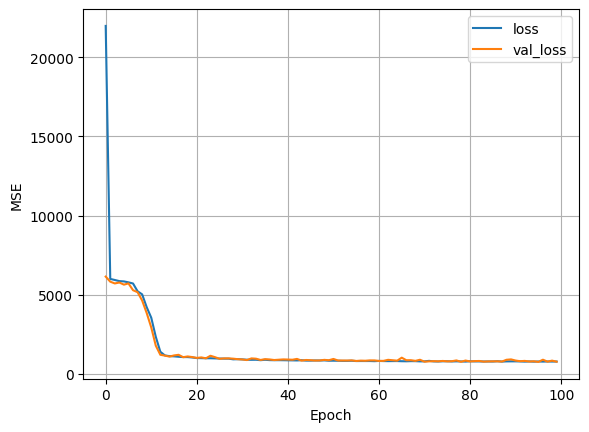

116/116 [==============================] - 0s 2ms/step - loss: 670.7047
16 nodes, dropout 0, lr 0.01, batch size 64


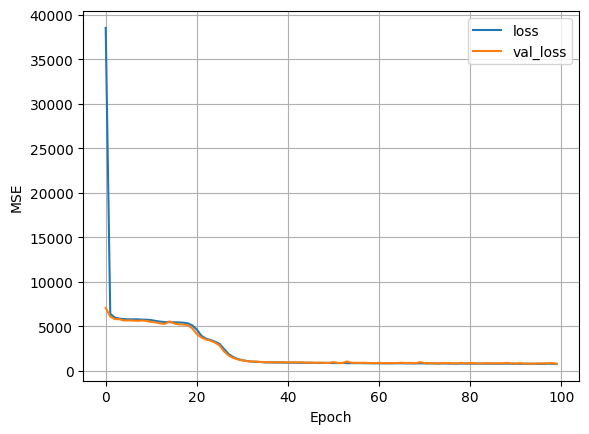

116/116 [==============================] - 0s 2ms/step - loss: 683.5976
16 nodes, dropout 0, lr 0.01, batch size 128


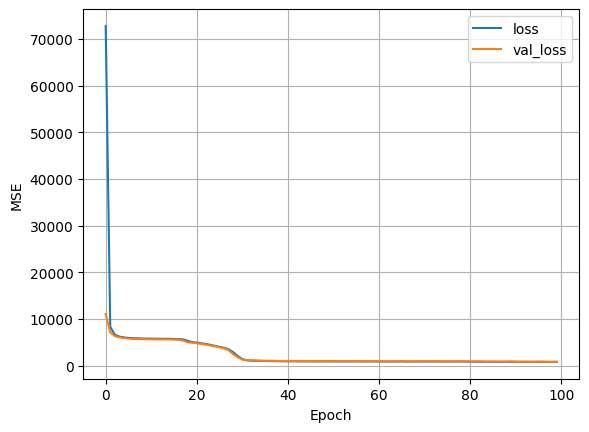

116/116 [==============================] - 0s 2ms/step - loss: 729.7043
16 nodes, dropout 0, lr 0.005, batch size 32


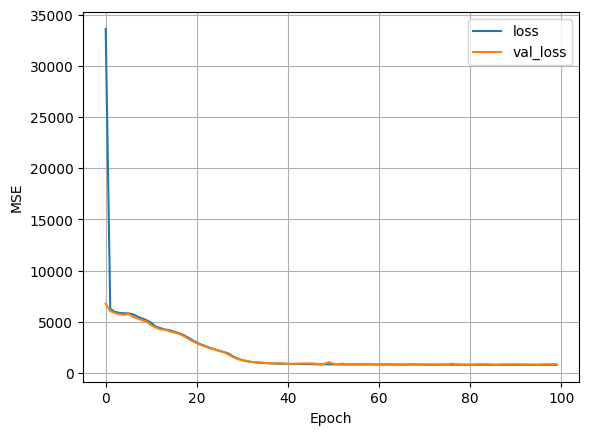

116/116 [==============================] - 0s 2ms/step - loss: 757.6369
16 nodes, dropout 0, lr 0.005, batch size 64


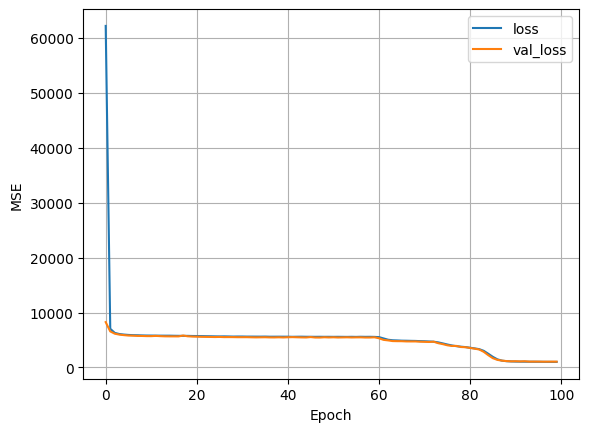

116/116 [==============================] - 0s 2ms/step - loss: 919.8811
16 nodes, dropout 0, lr 0.005, batch size 128


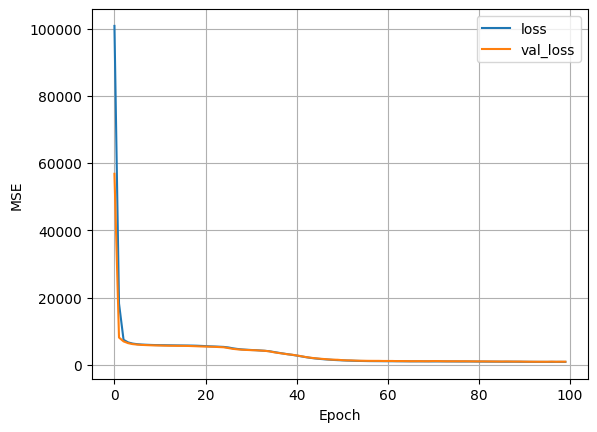

116/116 [==============================] - 0s 2ms/step - loss: 874.8034
16 nodes, dropout 0, lr 0.001, batch size 32


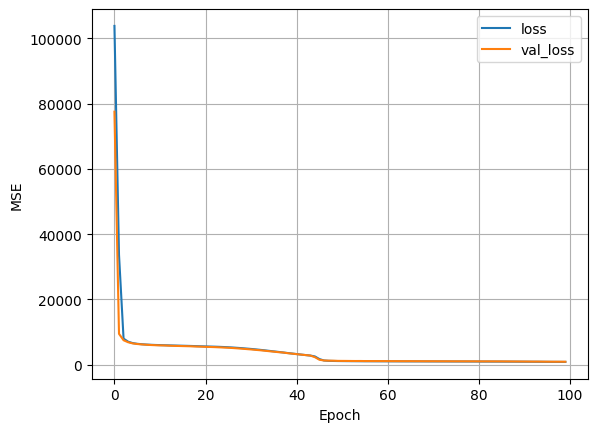

116/116 [==============================] - 0s 2ms/step - loss: 769.8652
16 nodes, dropout 0, lr 0.001, batch size 64


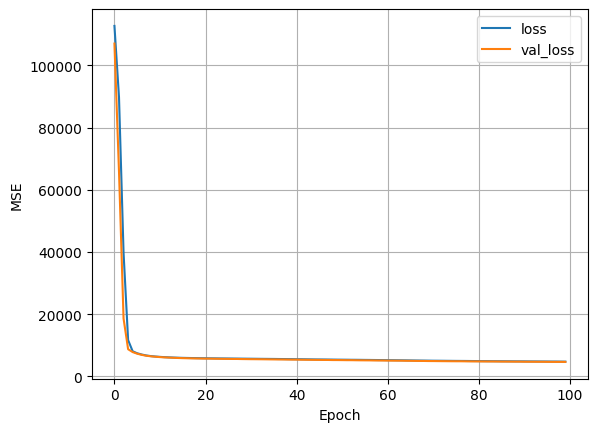

116/116 [==============================] - 0s 2ms/step - loss: 4584.6514
16 nodes, dropout 0, lr 0.001, batch size 128


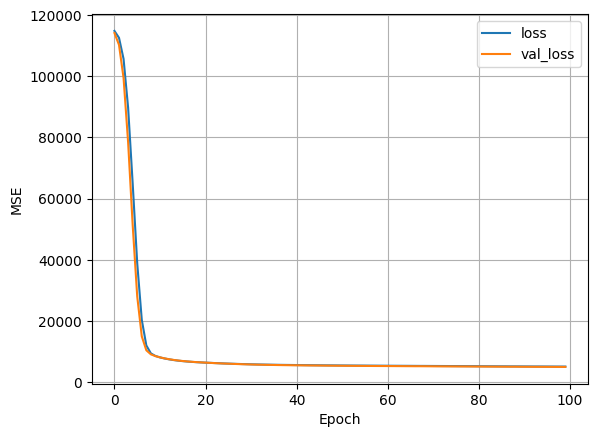

116/116 [==============================] - 0s 2ms/step - loss: 4870.6812
16 nodes, dropout 0.2, lr 0.01, batch size 32


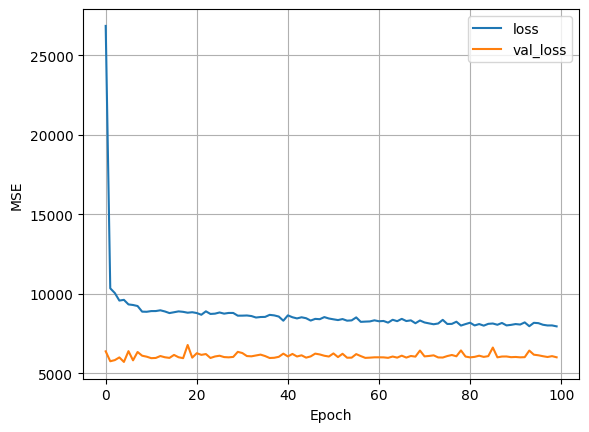

116/116 [==============================] - 0s 2ms/step - loss: 5787.1948
16 nodes, dropout 0.2, lr 0.01, batch size 64


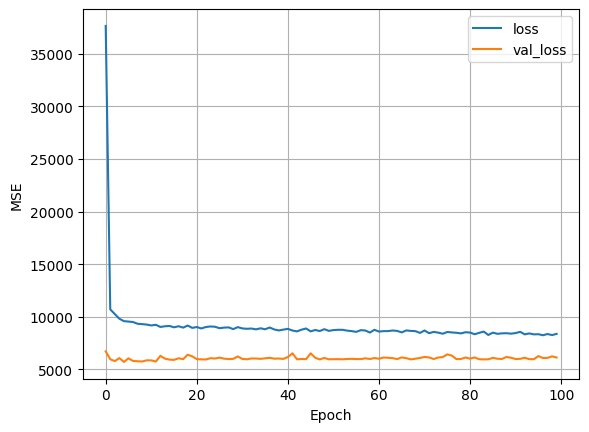

116/116 [==============================] - 0s 2ms/step - loss: 5948.6465
16 nodes, dropout 0.2, lr 0.01, batch size 128


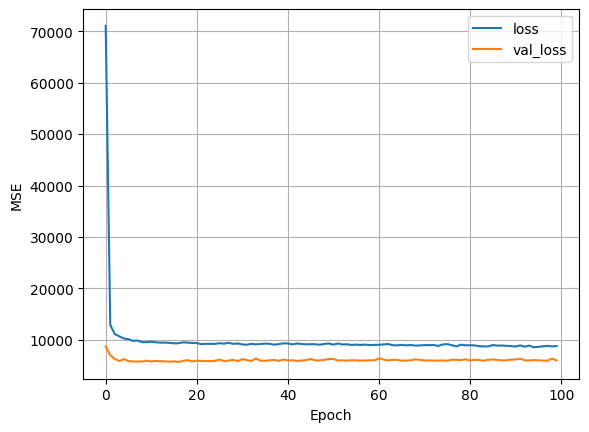

116/116 [==============================] - 0s 3ms/step - loss: 5772.8770
16 nodes, dropout 0.2, lr 0.005, batch size 32


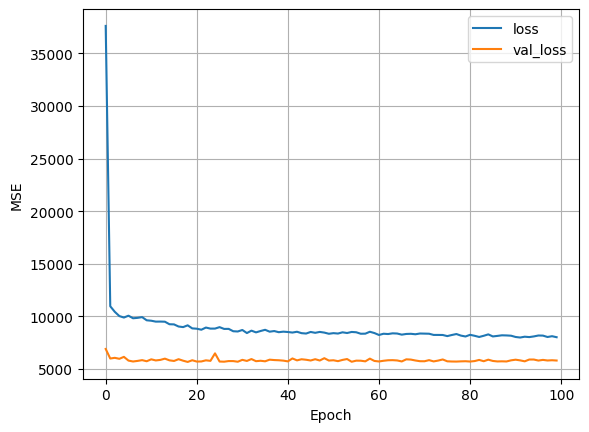

116/116 [==============================] - 0s 2ms/step - loss: 5631.5352
16 nodes, dropout 0.2, lr 0.005, batch size 64


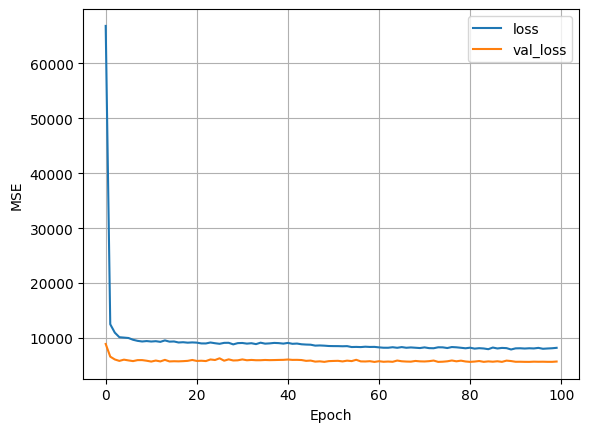

116/116 [==============================] - 0s 2ms/step - loss: 5534.0137
16 nodes, dropout 0.2, lr 0.005, batch size 128


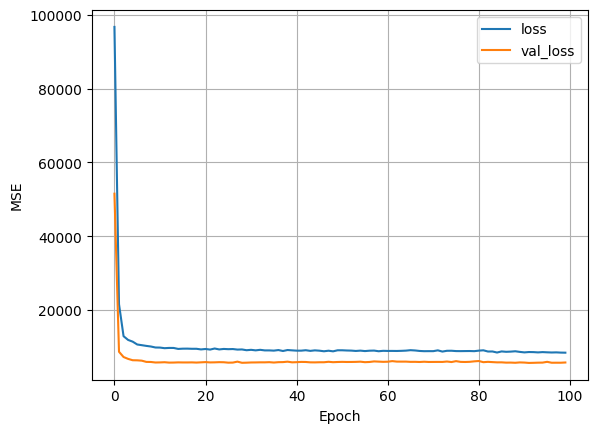

116/116 [==============================] - 0s 3ms/step - loss: 5623.3140
16 nodes, dropout 0.2, lr 0.001, batch size 32


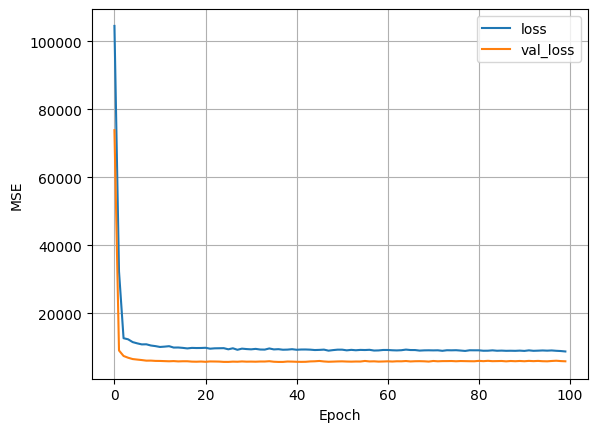

116/116 [==============================] - 0s 3ms/step - loss: 5730.3701
16 nodes, dropout 0.2, lr 0.001, batch size 64


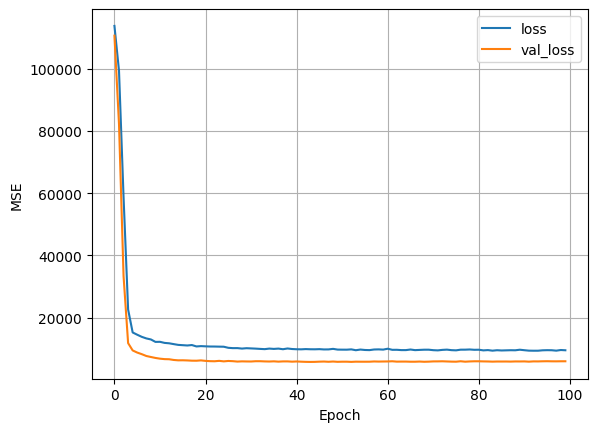

116/116 [==============================] - 0s 2ms/step - loss: 5772.2075
16 nodes, dropout 0.2, lr 0.001, batch size 128


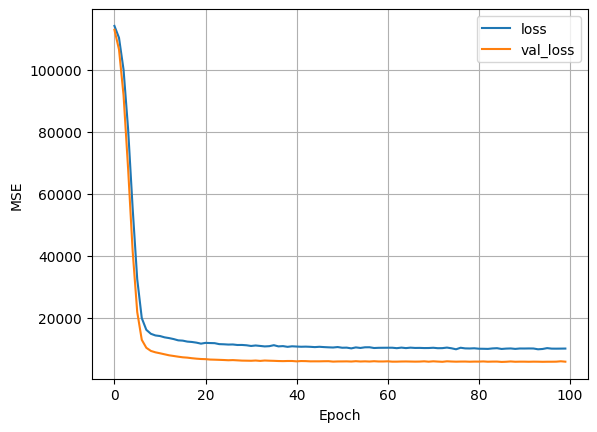

116/116 [==============================] - 0s 2ms/step - loss: 5662.5054
32 nodes, dropout 0, lr 0.01, batch size 32


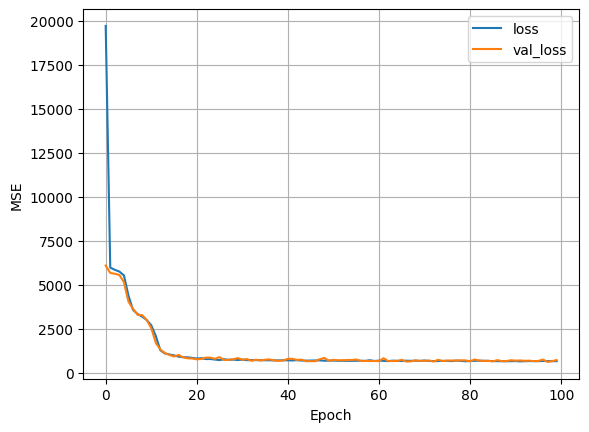

116/116 [==============================] - 0s 3ms/step - loss: 648.3804
32 nodes, dropout 0, lr 0.01, batch size 64


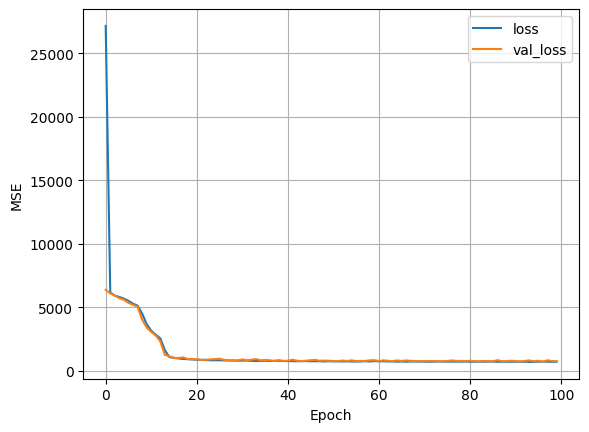

116/116 [==============================] - 0s 2ms/step - loss: 634.0690
32 nodes, dropout 0, lr 0.01, batch size 128


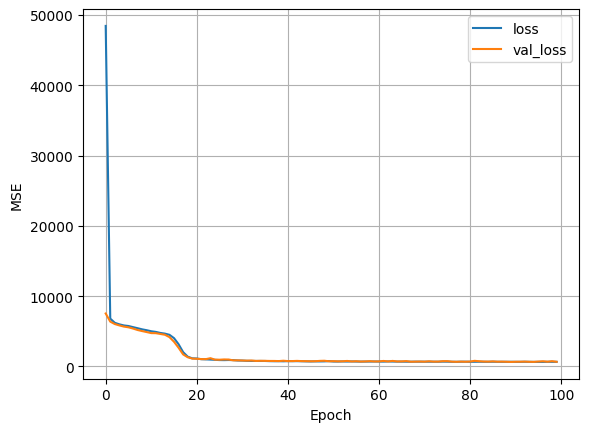

116/116 [==============================] - 0s 2ms/step - loss: 566.1912
32 nodes, dropout 0, lr 0.005, batch size 32


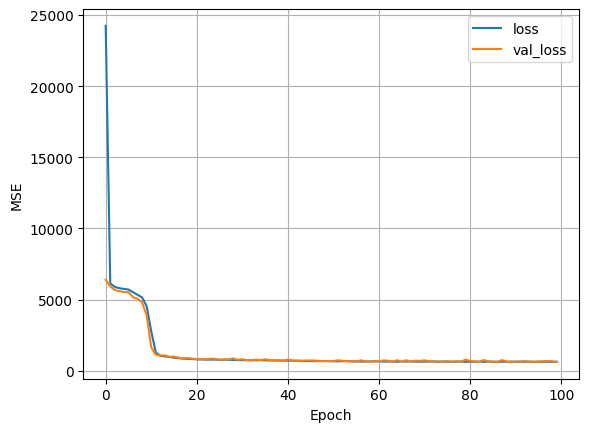

116/116 [==============================] - 0s 2ms/step - loss: 550.4846
32 nodes, dropout 0, lr 0.005, batch size 64


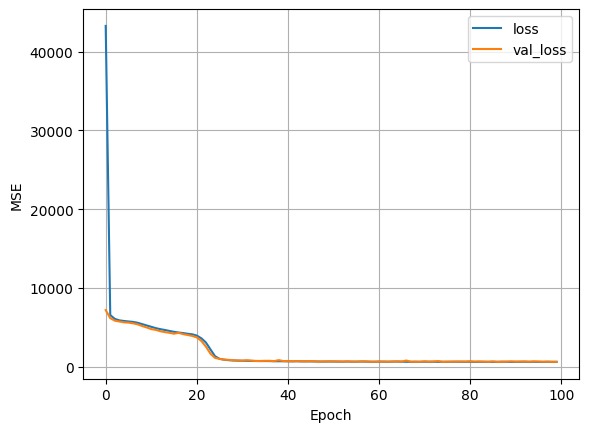

116/116 [==============================] - 0s 3ms/step - loss: 554.3814
32 nodes, dropout 0, lr 0.005, batch size 128


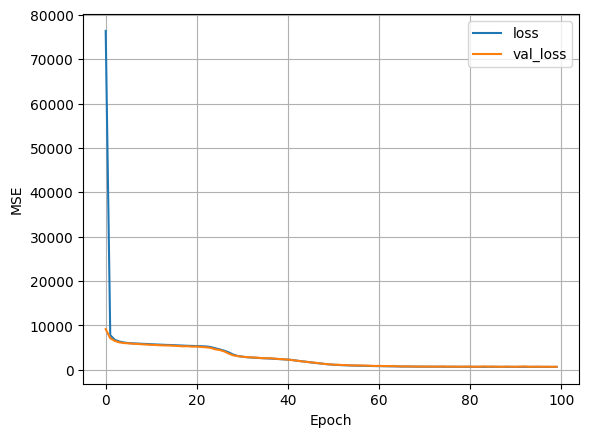

116/116 [==============================] - 0s 3ms/step - loss: 574.2010
32 nodes, dropout 0, lr 0.001, batch size 32


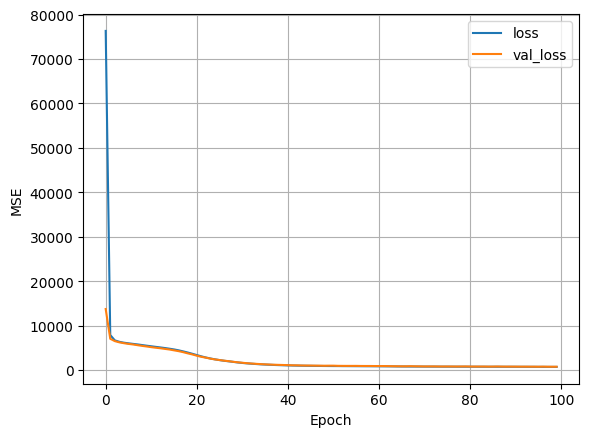

116/116 [==============================] - 0s 3ms/step - loss: 661.3264
32 nodes, dropout 0, lr 0.001, batch size 64


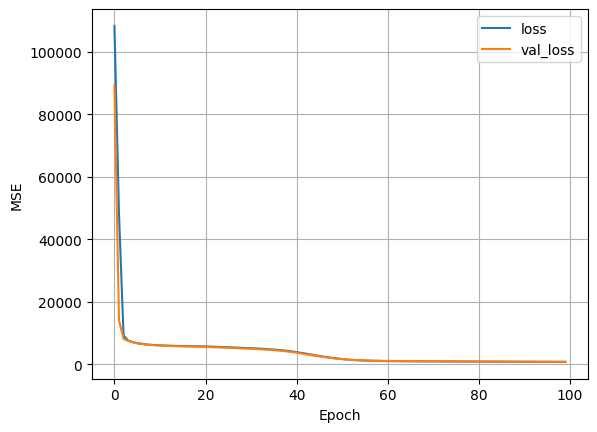

116/116 [==============================] - 0s 2ms/step - loss: 735.3648
32 nodes, dropout 0, lr 0.001, batch size 128


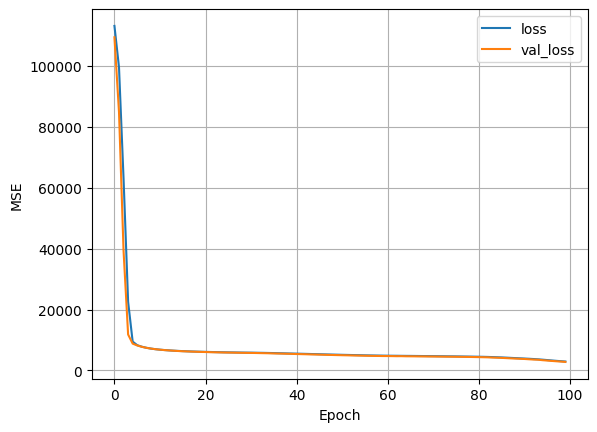

116/116 [==============================] - 0s 2ms/step - loss: 2725.2576
32 nodes, dropout 0.2, lr 0.01, batch size 32


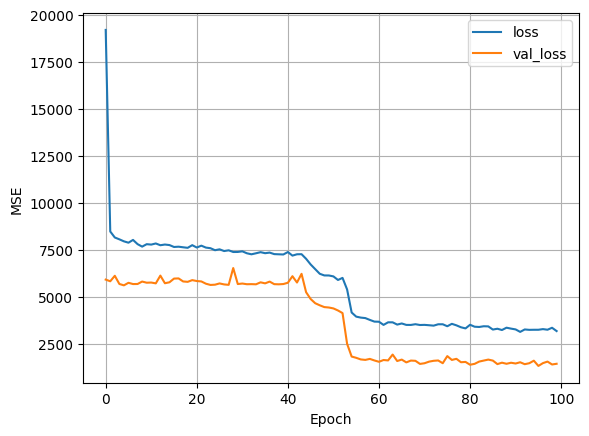

116/116 [==============================] - 0s 2ms/step - loss: 1263.1052
32 nodes, dropout 0.2, lr 0.01, batch size 64


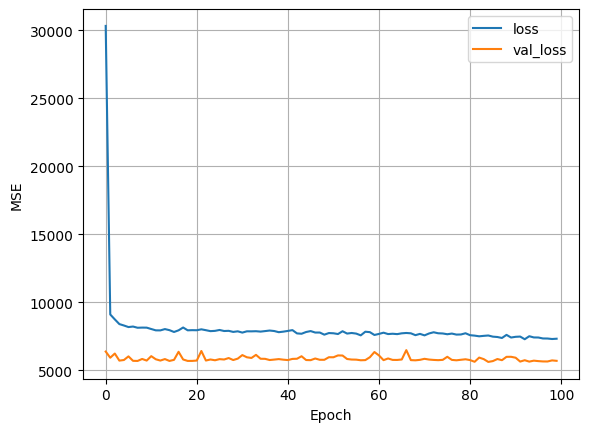

116/116 [==============================] - 0s 2ms/step - loss: 5497.3672
32 nodes, dropout 0.2, lr 0.01, batch size 128


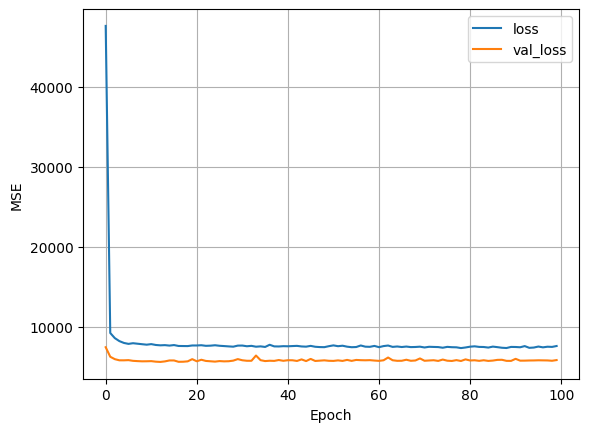

116/116 [==============================] - 0s 3ms/step - loss: 5619.1226
32 nodes, dropout 0.2, lr 0.005, batch size 32


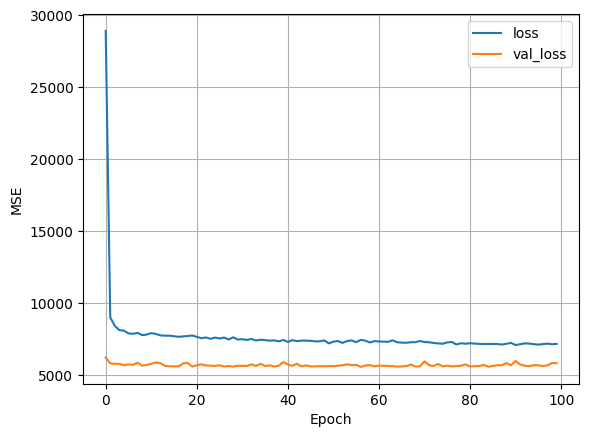

116/116 [==============================] - 0s 2ms/step - loss: 5678.8926
32 nodes, dropout 0.2, lr 0.005, batch size 64


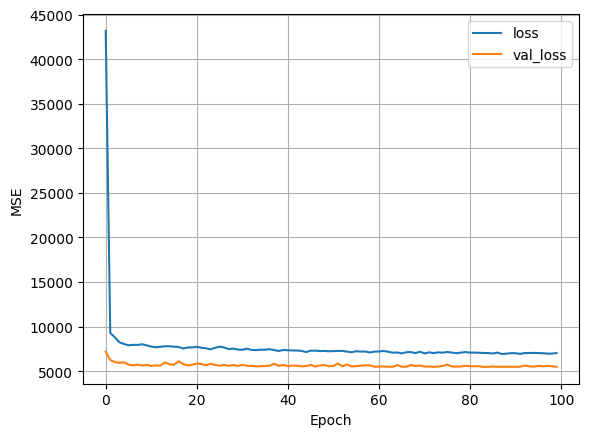

116/116 [==============================] - 0s 2ms/step - loss: 5306.5132
32 nodes, dropout 0.2, lr 0.005, batch size 128


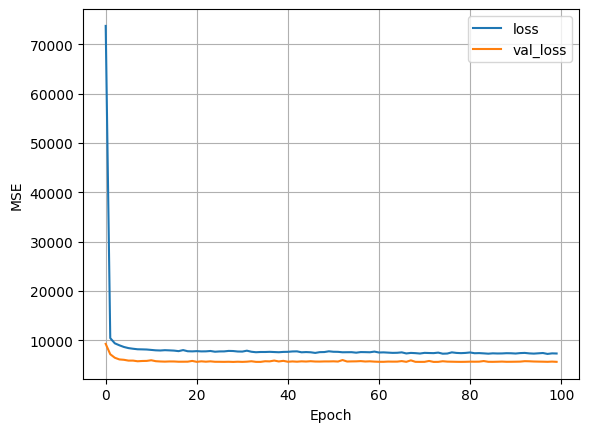

116/116 [==============================] - 0s 2ms/step - loss: 5379.8521
32 nodes, dropout 0.2, lr 0.001, batch size 32


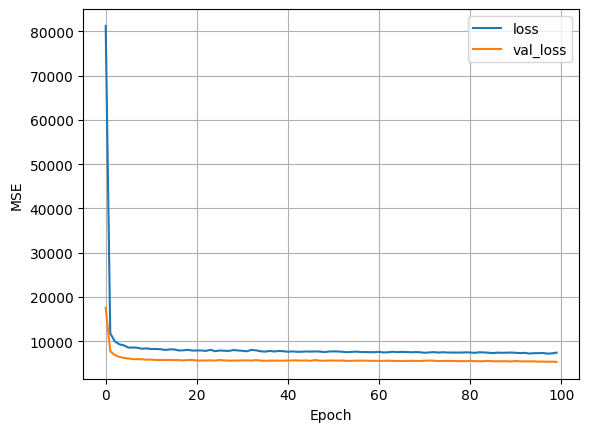

116/116 [==============================] - 0s 2ms/step - loss: 5132.0005
32 nodes, dropout 0.2, lr 0.001, batch size 64


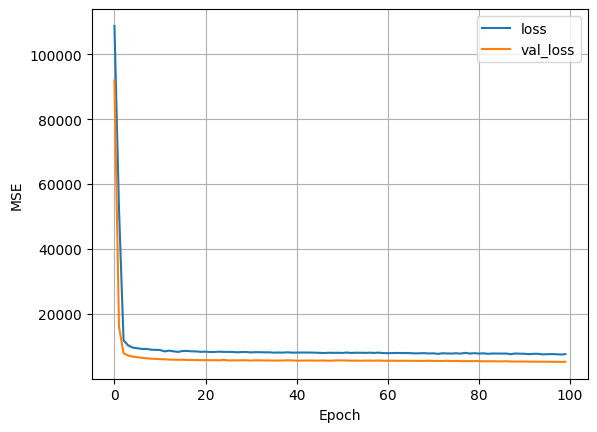

116/116 [==============================] - 0s 3ms/step - loss: 5073.8232
32 nodes, dropout 0.2, lr 0.001, batch size 128


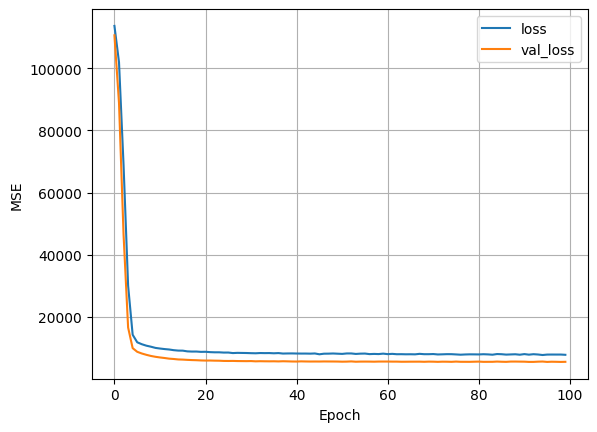

116/116 [==============================] - 0s 2ms/step - loss: 5405.5938
64 nodes, dropout 0, lr 0.01, batch size 32


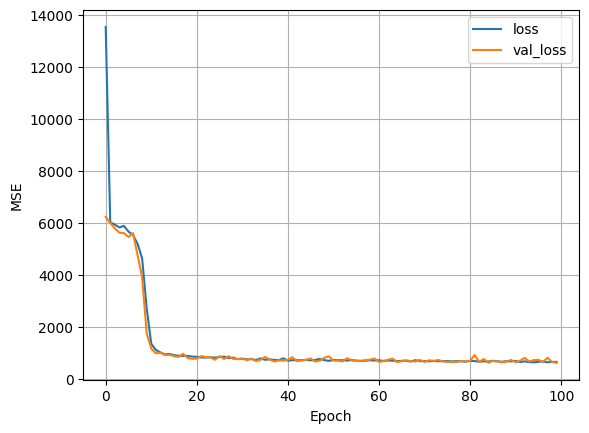

116/116 [==============================] - 0s 2ms/step - loss: 527.9443
64 nodes, dropout 0, lr 0.01, batch size 64


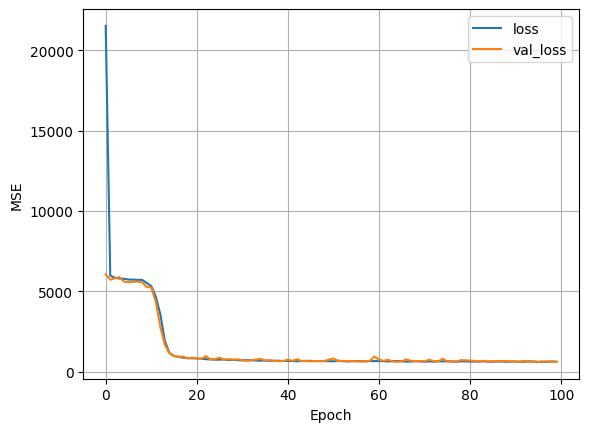

116/116 [==============================] - 0s 2ms/step - loss: 558.6085
64 nodes, dropout 0, lr 0.01, batch size 128


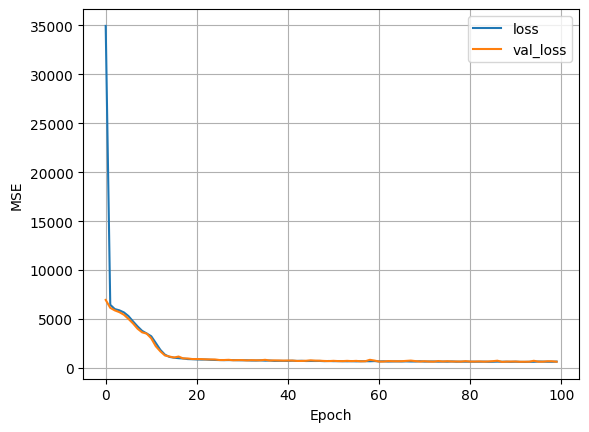

116/116 [==============================] - 0s 2ms/step - loss: 575.5952
64 nodes, dropout 0, lr 0.005, batch size 32


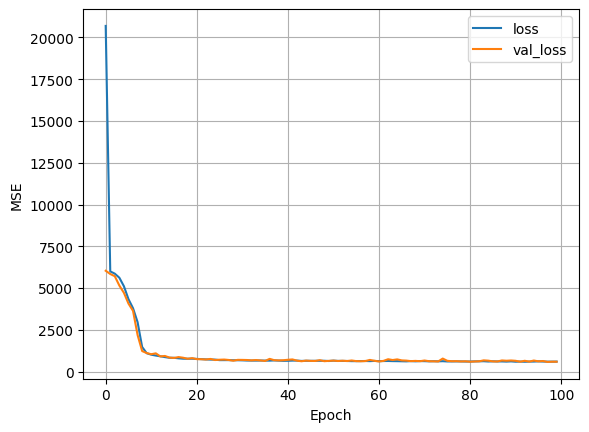

116/116 [==============================] - 0s 2ms/step - loss: 522.5844
64 nodes, dropout 0, lr 0.005, batch size 64


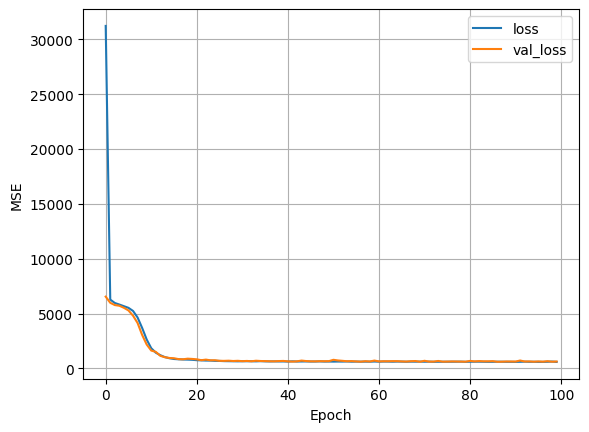

116/116 [==============================] - 0s 2ms/step - loss: 550.2847
64 nodes, dropout 0, lr 0.005, batch size 128


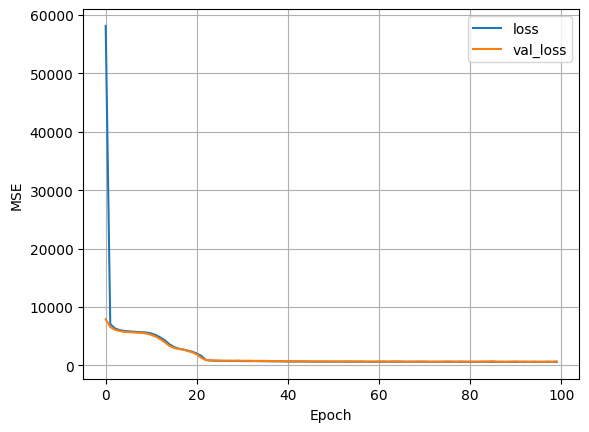

116/116 [==============================] - 0s 3ms/step - loss: 625.5418
64 nodes, dropout 0, lr 0.001, batch size 32


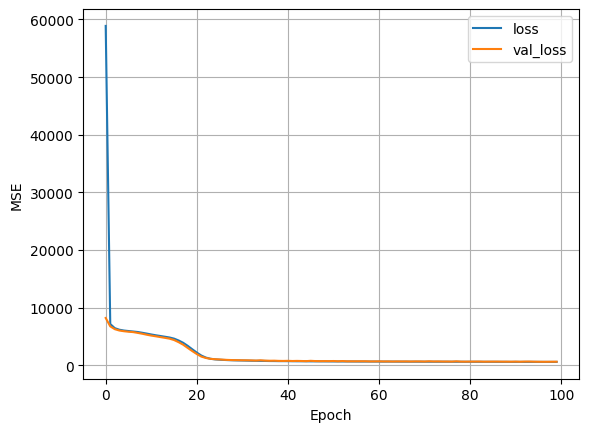

116/116 [==============================] - 0s 2ms/step - loss: 551.1679
64 nodes, dropout 0, lr 0.001, batch size 64


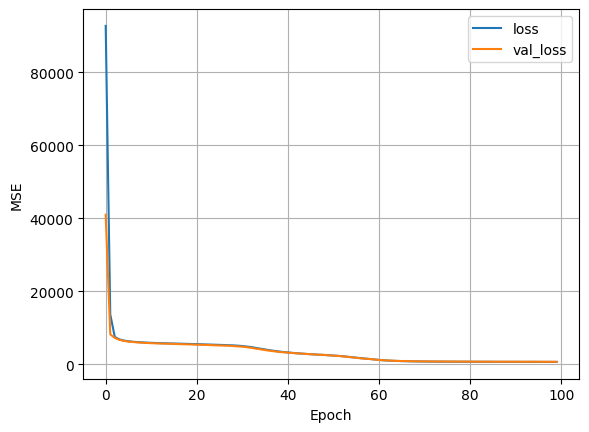

116/116 [==============================] - 0s 2ms/step - loss: 613.3738
64 nodes, dropout 0, lr 0.001, batch size 128


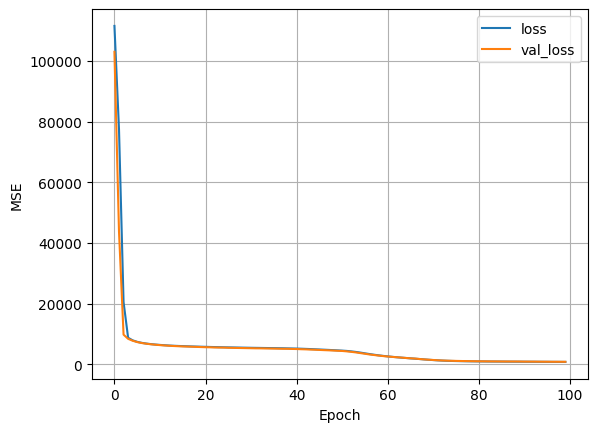

116/116 [==============================] - 0s 2ms/step - loss: 714.5966
64 nodes, dropout 0.2, lr 0.01, batch size 32


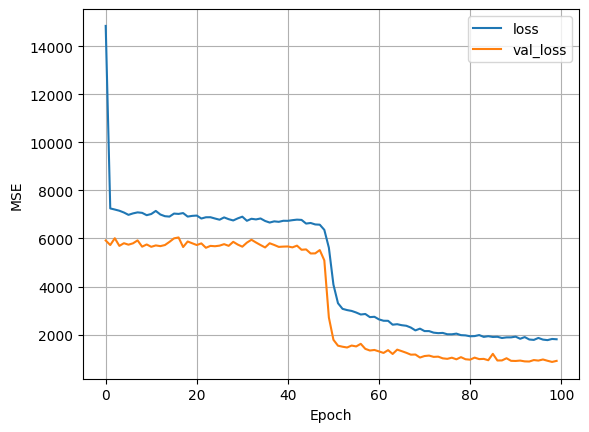

116/116 [==============================] - 0s 2ms/step - loss: 794.1517
64 nodes, dropout 0.2, lr 0.01, batch size 64


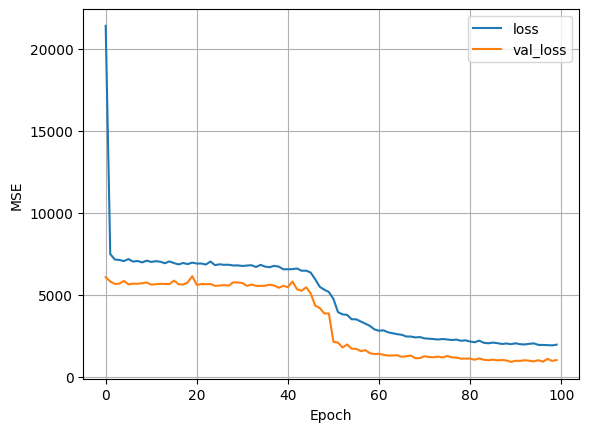

116/116 [==============================] - 0s 2ms/step - loss: 905.4044
64 nodes, dropout 0.2, lr 0.01, batch size 128


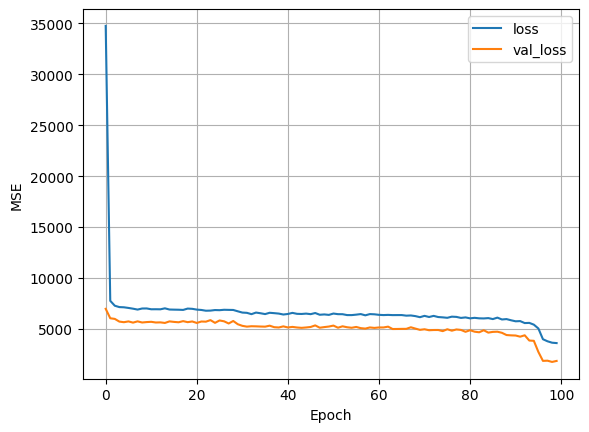

116/116 [==============================] - 0s 2ms/step - loss: 1682.2327
64 nodes, dropout 0.2, lr 0.005, batch size 32


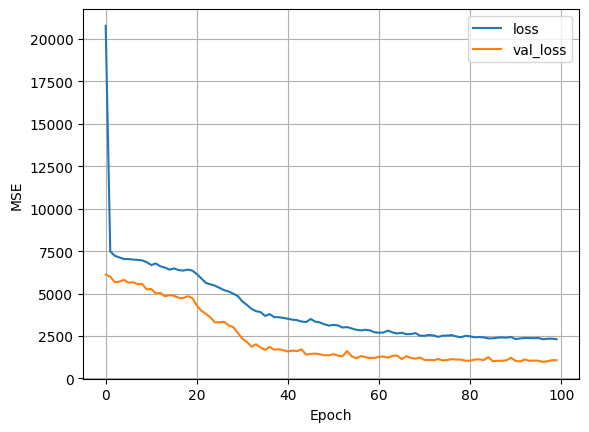

116/116 [==============================] - 0s 3ms/step - loss: 930.9404
64 nodes, dropout 0.2, lr 0.005, batch size 64


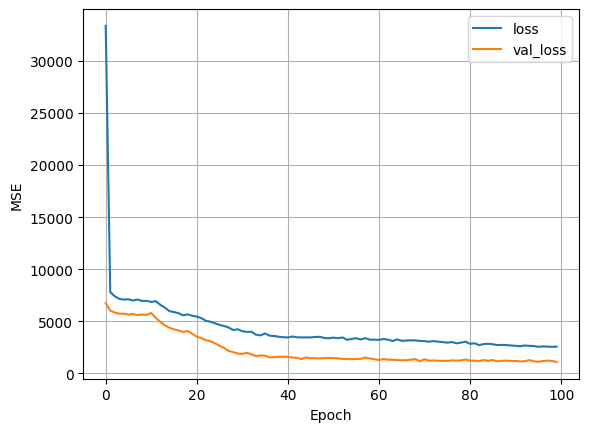

116/116 [==============================] - 0s 2ms/step - loss: 955.7323
64 nodes, dropout 0.2, lr 0.005, batch size 128


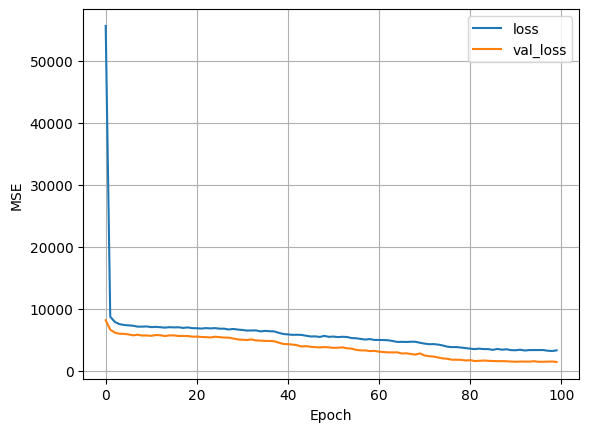

116/116 [==============================] - 0s 2ms/step - loss: 1251.4375
64 nodes, dropout 0.2, lr 0.001, batch size 32


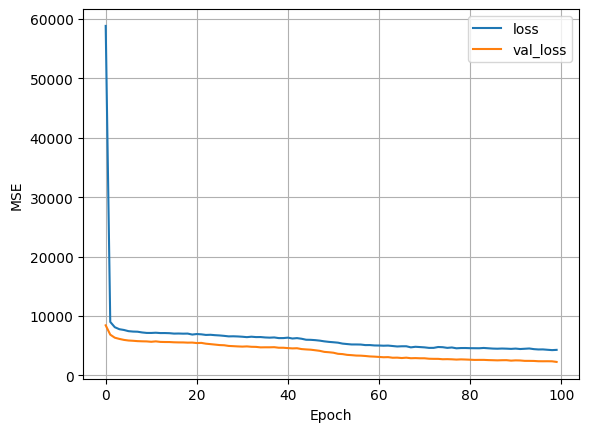

116/116 [==============================] - 0s 2ms/step - loss: 2171.6438
64 nodes, dropout 0.2, lr 0.001, batch size 64


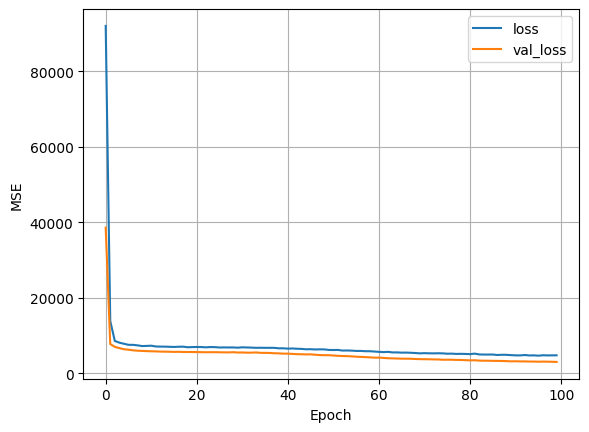

116/116 [==============================] - 0s 2ms/step - loss: 2888.4155
64 nodes, dropout 0.2, lr 0.001, batch size 128


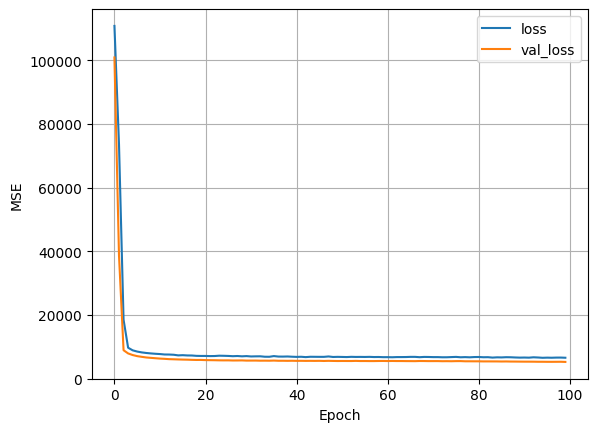

116/116 [==============================] - 0s 2ms/step - loss: 5059.0303


In [74]:
least_val_loss = float('inf')
least_loss_model = None
epochs=100
for num_nodes in [16, 32, 64]:
  for dropout_prob in[0, 0.2]:
    for lr in [0.01, 0.005, 0.001]:
      for batch_size in [32, 64, 128]:
        print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
        model, history = train_model(x_train_norm, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_loss(history)
        val_loss = model.evaluate(x_test_norm, y_test)
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model

In [75]:
y_pred_nn = least_loss_model.predict(x_test_norm)

116/116 [==============================] - 0s 1ms/step


In [76]:
print(f'The MSE for Model ridge is: {mean_squared_error(y_test, y_pred_nn)}')

The MSE for Model ridge is: 522.5843920064644


In [77]:
print(f'The MAE for Model ridge is: {mean_absolute_error(y_test, y_pred_nn)}')

The MAE for Model ridge is: 15.415179675722674


In [78]:
print(f'The R2 score for Model Ridge is: {r2_score(y_test, y_pred_nn)}')

The R2 score for Model Ridge is: 0.9569070146888212


In [85]:
x_try = X_test.iloc[2]
print(x_try)
print(f'The target should be: {y_test.iloc[2]}')
arr = x_try.values
reshaped_arr = arr.reshape((1, -1))
print(reshaped_arr.shape)
print(X_test.shape)

Provincia             12
Region                 5
Tipo_Producto          4
Compania_Bandera       2
Anio                2023
Mes                   10
Name: 6614, dtype: int64
The target should be: 289
(1, 6)
(3709, 6)


In [86]:
reshaped_arr_norm = scaler.transform(reshaped_arr)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [87]:
y_pred_try = least_loss_model.predict(reshaped_arr_norm)
print(f'La prediccion del algoritmo es: {y_pred_try[0]}')

1/1 [==============================] - 0s 29ms/step
La prediccion del algoritmo es: [291.0377]


In [88]:
import joblib
joblib.dump(least_loss_model, 'nn_model.sav')

['nn_model.sav']